# HCPC with MCA

In [1]:
# Set environment
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

# load datasets
import pandas as pd
tea = pd.read_excel("tea.xlsx")
tea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   breakfast         300 non-null    object
 1   tea.time          300 non-null    object
 2   evening           300 non-null    object
 3   lunch             300 non-null    object
 4   dinner            300 non-null    object
 5   always            300 non-null    object
 6   home              300 non-null    object
 7   work              300 non-null    object
 8   tearoom           300 non-null    object
 9   friends           300 non-null    object
 10  resto             300 non-null    object
 11  pub               300 non-null    object
 12  Tea               300 non-null    object
 13  How               300 non-null    object
 14  sugar             300 non-null    object
 15  how               300 non-null    object
 16  where             300 non-null    object
 17  price           

## MCA on tea

In [2]:
# MCA
from scientisttools.decomposition import MCA

mca = MCA(n_components=20,
          matrix_type="completed",
          row_labels=tea.index,
          var_labels=list(tea.columns[:18]),
          quanti_sup_labels=["age"],
          quali_sup_labels=tea.columns[19:],
          parallelize=True)

mca.fit(tea)

MCA(n_components=20, parallelize=True,
    quali_sup_labels=Index(['sex', 'SPC', 'Sport', 'age_Q', 'frequency', 'escape.exoticism',
       'spirituality', 'healthy', 'diuretic', 'friendliness',
       'iron.absorption', 'feminine', 'sophisticated', 'slimming', 'exciting',
       'relaxing', 'effect.on.health'],
      dtype='object'),
    quanti_sup_labels=['age'], row_labels=RangeIndex(start=0, stop=300, step=1),
    var_labels=['breakfast', 'tea.time', 'evening', 'lunch', 'dinner', 'always',
                'home', 'work', 'tearoom', 'friends', 'resto', 'pub', 'Tea',
                'How', 'sugar', 'how', 'where', 'price'])

## HCPC

In [3]:
from scientisttools.clustering import HCPC

hcpc = HCPC(n_clusters=3,
            metric="euclidean",
            method="ward",
            parallelize=True)
hcpc.fit(mca)

HCPC(n_clusters=3, parallelize=True)

In [4]:
hcpc.cluster_infos_

,n(k),p(k)
cluster,,
cluster_1,169,0.563333
cluster_2,59,0.196667
cluster_3,72,0.240000


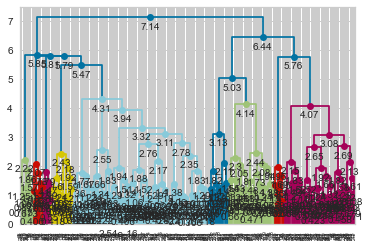

In [5]:
from scientisttools.pyplot import plot_dendrogram
import matplotlib.pyplot as plt

plot_dendrogram(hcpc)

In [6]:
hcpc.cluster_centers_

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17,Dim.18,Dim.19,Dim.20
cluster,,,,,,,,,,,,,,,,,,,,
cluster_1,-0.177637,-0.162543,-0.005504,-0.046393,0.007807,0.053643,-0.031868,-0.002050,0.006527,-0.002202,0.001209,-0.012952,-0.018241,-0.000091,-0.009617,-0.014247,-0.020703,-0.017079,0.007299,0.006645
cluster_2,-0.013856,0.526754,0.022050,-0.031045,-0.051762,0.005304,0.012751,-0.020530,-0.038687,0.024767,0.057127,-0.008251,-0.016761,0.026998,0.023788,0.103553,0.022056,0.041015,-0.040950,-0.011050
cluster_3,0.428307,-0.050122,-0.005149,0.134335,0.024091,-0.130259,0.064354,0.021635,0.016380,-0.015127,-0.049650,0.037162,0.056551,-0.021910,0.003080,-0.051414,0.030520,0.006478,0.016423,-0.006543


In [7]:
from scientisttools.pyplot import plotHCPC 

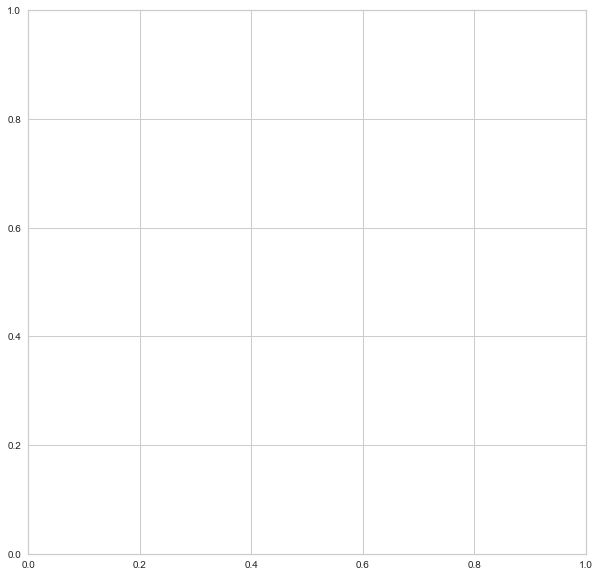

In [8]:
fig, axe = plt.subplots(figsize=(10,10))
#plotHCPC(hcpc,ax=axe)
#plt.show()

In [9]:
hcpc.desc_axes_correlation_ratio_

,Sum. Intra,Sum. Inter,correlation ratio,F-stats,pvalue
Dim.2,15.4474,21.0166,0.5764,202.0383,0.0000
Dim.1,25.9301,18.5523,0.4171,106.2479,0.0000
Dim.6,19.7045,1.7096,0.0798,12.8843,0.0000
Dim.4,21.6964,1.7199,0.0734,11.7719,0.0000
Dim.16,13.2141,0.8573,0.0609,9.6344,0.0001
Dim.7,19.8693,0.4794,0.0236,3.5830,0.0290
Dim.11,16.7530,0.3703,0.0216,3.2822,0.0389
Dim.13,15.2758,0.3031,0.0195,2.9462,0.0541
Dim.18,11.9232,0.1516,0.0126,1.8877,0.1532
Dim.17,13.4961,0.1682,0.0123,1.8507,0.1589


In [10]:
hcpc.desc_axes_infos_

vtest    pvalue  mean in category  overall mean  \
cluster_1 Dim.6    3.943368  0.000080          0.053643 -4.163336e-18   
          Dim.19   0.734241  0.462802          0.007299 -3.895032e-17   
          Dim.20   0.682464  0.494946          0.006645  2.942091e-17   
          Dim.5    0.564633  0.572324          0.007807 -2.405483e-18   
          Dim.9    0.515513  0.606195          0.006527  3.608225e-18   
          Dim.11   0.099392  0.920827          0.001209 -7.105427e-17   
          Dim.14  -0.008073  0.993558         -0.000091 -5.837923e-17   
          Dim.8   -0.157530  0.874827         -0.002050 -2.868076e-17   
          Dim.10  -0.178761  0.858125         -0.002202  2.794061e-17   
          Dim.3   -0.360318  0.718609         -0.005504  8.622732e-17   
          Dim.15  -0.859348  0.390149         -0.009617  2.937465e-17   
          Dim.12  -1.090411  0.275532         -0.012952  3.848773e-17   
          Dim.16  -1.292027  0.196348         -0.014247  5.616167e-19   
          Dim.13  -1.572146  0.115917         -0.018241  2.072416e-17   
          Dim.18  -1.671919  0.094540         -0.017079  9.806970e-18   
          Dim.17  -1.905178  0.056757         -0.020703  1.785609e-17   
          Dim.7   -2.403239  0.016251         -0.031868 -6.245005e-17   
          Dim.4   -3.261370  0.001109         -0.046393 -1.054712e-16   
          Dim.1   -9.060303  0.000000         -0.177637  2.701543e-17   
          Dim.2   -9.156705  0.000000         -0.162543 -4.903485e-17   
cluster_2 Dim.2   12.926755  0.000000          0.526754 -4.903485e-17   
          Dim.16   4.090808  0.000043          0.103553  5.616167e-19   
          Dim.11   2.045793  0.040777          0.057127 -7.105427e-17   
          Dim.18   1.749112  0.080272          0.041015  9.806970e-18   
          Dim.14   1.046200  0.295469          0.026998 -5.837923e-17   
          Dim.15   0.925972  0.354461          0.023788  2.937465e-17   
          Dim.17   0.884193  0.376592          0.022056  1.785609e-17   
          Dim.10   0.875888  0.381091          0.024767  2.794061e-17   
          Dim.3    0.628798  0.529481          0.022050  8.622732e-17   
          Dim.7    0.418869  0.675312          0.012751 -6.245005e-17   
          Dim.6    0.169864  0.865117          0.005304 -4.163336e-18   
          Dim.12  -0.302610  0.762187         -0.008251  3.848773e-17   
          Dim.1   -0.307873  0.758179         -0.013856  2.701543e-17   
          Dim.20  -0.494367  0.621047         -0.011050  2.942091e-17   
          Dim.13  -0.629276  0.529168         -0.016761  2.072416e-17   
          Dim.8   -0.687218  0.491945         -0.020530 -2.868076e-17   
          Dim.4   -0.950714  0.341749         -0.031045 -1.054712e-16   
          Dim.9   -1.330985  0.183194         -0.038687  3.608225e-18   
          Dim.5   -1.630745  0.102944         -0.051762 -2.405483e-18   
          Dim.19  -1.794415  0.072747         -0.040950 -3.895032e-17   
cluster_3 Dim.1   10.808283  0.000000          0.428307  2.701543e-17   
          Dim.4    4.672249  0.000003          0.134335 -1.054712e-16   
          Dim.13   2.411393  0.015892          0.056551  2.072416e-17   
          Dim.7    2.401053  0.016348          0.064354 -6.245005e-17   
          Dim.12   1.547931  0.121639          0.037162  3.848773e-17   
          Dim.17   1.389586  0.164655          0.030520  1.785609e-17   
          Dim.5    0.861994  0.388691          0.024091 -2.405483e-18   
          Dim.8    0.822521  0.410781          0.021635 -2.868076e-17   
          Dim.19   0.817352  0.413727          0.016423 -3.895032e-17   
          Dim.9    0.640056  0.522136          0.016380  3.608225e-18   
          Dim.18   0.313739  0.753720          0.006478  9.806970e-18   
          Dim.15   0.136179  0.891680          0.003080  2.937465e-17   
          Dim.3   -0.166772  0.867549         -0.005149  8.622732e-17   
          Dim.20  -0.332449  0.739550         -0.006543  2.942091e-17   
       

In [11]:
hcpc.desc_var_quali_["chi2"]

,statistic,df,pvalue
breakfast,0.959608,2.0,6.189048e-01
tea.time,3.672930,2.0,1.593798e-01
evening,1.147543,2.0,5.633966e-01
lunch,7.609838,2.0,2.226100e-02
dinner,30.208448,2.0,2.756252e-07
always,14.318400,2.0,7.776764e-04
home,10.545199,2.0,5.130258e-03
work,14.829259,2.0,6.023754e-04
tearoom,39.874234,2.0,2.194927e-09
friends,30.638566,2.0,2.222900e-07


In [12]:
hcpc.desc_var_quali_sup_

{'chi2':                   statistic    df    pvalue
 sex               16.387287   2.0  0.000276
 SPC               15.313628  12.0  0.224731
 Sport              0.661098   2.0  0.718529
 age_Q             13.192925   8.0  0.105382
 frequency          8.768684   6.0  0.187011
 escape.exoticism   1.554745   2.0  0.459612
 spirituality       1.609716   2.0  0.447151
 healthy            2.917470   2.0  0.232530
 diuretic           0.229342   2.0  0.891659
 friendliness       3.769049   2.0  0.151901
 iron.absorption    1.270316   2.0  0.529852
 feminine           1.795583   2.0  0.407469
 sophisticated      0.792392   2.0  0.672875
 slimming           2.366132   2.0  0.306338
 exciting           2.354770   2.0  0.308083
 relaxing           0.280306   2.0  0.869225
 effect.on.health   2.976943   2.0  0.225717,
 'gtest':                   statistic    df    pvalue
 sex               16.387287   2.0  0.000276
 SPC               15.313628  12.0  0.224731
 Sport              0.661098   2.0  0

In [13]:
hcpc.var_quali_infos_

,n(s),p(s)
breakfast=Not.breakfast,156.0,0.520000
breakfast=breakfast,144.0,0.480000
tea.time=Not.tea time,131.0,0.436667
tea.time=tea time,169.0,0.563333
evening=Not.evening,197.0,0.656667
evening=evening,103.0,0.343333
lunch=Not.lunch,256.0,0.853333
lunch=lunch,44.0,0.146667
dinner=Not.dinner,279.0,0.930000
dinner=dinner,21.0,0.070000


In [14]:
hcpc.desc_var_category_.loc["cluster_1",]

,Class/Mod,Mod/Class,Global
breakfast=Not.breakfast,54.487179,50.295858,52.000000
breakfast=breakfast,58.333333,49.704142,48.000000
tea.time=Not.tea time,61.832061,47.928994,43.666667
tea.time=tea time,52.071006,52.071006,56.333333
evening=Not.evening,54.822335,63.905325,65.666667
evening=evening,59.223301,36.094675,34.333333
lunch=Not.lunch,55.859375,84.615385,85.333333
lunch=lunch,59.090909,15.384615,14.666667
dinner=Not.dinner,59.498208,98.224852,93.000000
dinner=dinner,14.285714,1.775148,7.000000


In [15]:
hcpc.desc_var_quanti_sup_

,,vtest,pvalue,mean in category,overall mean,sd in categorie,overall sd,significant
cluster_1,age,-1.773415,0.076160,35.532544,37.053333,16.582601,16.842322,*
cluster_2,age,1.996239,0.045908,40.983051,37.053333,16.806467,16.842322,**
cluster_3,age,0.201609,0.840222,37.402778,37.053333,16.935876,16.842322,


## Caractérisation par les individus

### Individus proches

In [16]:
hcpc.disto_near_

index  distance
cluster_1 0     284  0.367526
          1     142  0.368603
          2       6  0.405655
          3      70  0.427151
          4     174  0.429889
...             ...       ...
cluster_3 67     21  2.374845
          68    134  2.418577
          69    147  2.633885
          70    203  3.192423
          71     65  3.324101

[300 rows x 2 columns]

In [17]:
# Individus loin
hcpc.disto_far_

index  distance
cluster_1 0      81  3.528455
          1     288  3.291564
          2     291  3.109027
          3      93  3.100804
          4     152  3.098836
...             ...       ...
cluster_3 67     47  0.639122
          68    234  0.631234
          69    232  0.590260
          70    171  0.566898
          71     32  0.498424

[300 rows x 2 columns]

In [18]:
# Parangons
hcpc.parangons_

,parangons,distance
cluster_1,284,0.367526
cluster_2,15,0.591696
cluster_3,32,0.498424
